<h3>Testing Notebook</h3>

In [1]:
import sys
sys.path.append('../..')

In [2]:
import torch
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.nn.functional as F

In [3]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
polarization = ["", "ib", "ig", "i0", "i3", "i4"]
replicas, size = 2, 1288 # replicated

In [4]:
from core.getdata import *
from core.dataset import *

<h3>Example of GetData</h3>

In [5]:
TNFib1 = GetData(ligands[0], polarization[1], replicas, size)
TNFib1.X.shape

(1288, 98)

<h3>Example of Dataset</h3>

In [6]:
data = DatasetPolar(ligands, polarization, replicas, size)

In [7]:
%%time
for _ in data:
    pass

Wall time: 43 ms


In [8]:
data.data.shape

(69552, 98, 1)

In [9]:
print(type(data.data), type(data.labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [10]:
print(data.labels, data.labels.shape) #labels are multi-hot encoded

[0 0 0 ... 8 8 8] (69552,)


<h3>Initializing Dataloaders</h3>

In [11]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [12]:
X_len, test_len = int(len(data.data) * 0.9), int(len(data.data) * 0.1)
train_len, val_len = int(X_len * 0.9), int(X_len * 0.1)
print(X_len, test_len, train_len, val_len) #lengths
print(X_len + test_len, len(data.data))

62596 6955 56336 6259
69551 69552


In [13]:
training_data = data.data.reshape(data.data.shape[0], data.data.shape[1], 1) #adds extra dimension

In [14]:
data.data[1000].shape
len(data)

69552

In [15]:
dataset_X, dataset_val = torch.utils.data.random_split(data, [X_len, test_len+1]) # still np arrays

In [16]:
dataloader_train = torch.utils.data.DataLoader(dataset_X, batch_size=64, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=64, shuffle=True)

In [17]:
print(len(dataloader_train), len(dataloader_val), len(dataloader_train) + len(dataloader_val))
###
#data[0:10]

979 109 1088


<h3>Model Training</h3>

In [18]:
from core.network import *
from core.trainer import *

In [19]:
torch.cuda.is_available()

True

In [20]:
#model parameters
input_size = 1
hidden_sizes = 98
output_size = 9

#training parameters
n_epochs = 50
batch_size = 64
learning_rate = 1e-3

In [21]:
model = LSTM(input_size, hidden_sizes, output_size, num_layers=1, device="cuda:0")
model.train()

LSTM(
  (lstm): LSTM(1, 98, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [22]:
trainer = LSTMTrainer(model=model, device="cuda:0")

In [23]:
trainer.train(dataloader_train, dataloader_val, batch_size=batch_size, n_epochs=n_epochs)

  2%|█▋                                                                                 | 1/50 [00:09<07:25,  9.10s/it]

Epoch 001: | Training Loss: 2.1783785810266014 | Validation Loss: 2.186937948979369


  4%|███▎                                                                               | 2/50 [00:17<06:52,  8.59s/it]

Epoch 002: | Training Loss: 2.1848501898538593 | Validation Loss: 2.149623551499953


  6%|████▉                                                                              | 3/50 [00:25<06:33,  8.37s/it]

Epoch 003: | Training Loss: 2.150665354923525 | Validation Loss: 2.181260817641512


  8%|██████▋                                                                            | 4/50 [00:33<06:26,  8.39s/it]

Epoch 004: | Training Loss: 2.1491479750673177 | Validation Loss: 2.100648871255577


 10%|████████▎                                                                          | 5/50 [00:42<06:25,  8.58s/it]

Epoch 005: | Training Loss: 2.091673864163953 | Validation Loss: 2.1483961004729664


 12%|█████████▉                                                                         | 6/50 [00:51<06:24,  8.73s/it]

Epoch 006: | Training Loss: 2.004601989873705 | Validation Loss: 1.8862300804995615


 14%|███████████▌                                                                       | 7/50 [01:00<06:18,  8.81s/it]

Epoch 007: | Training Loss: 1.881007247243887 | Validation Loss: 1.8511962343793396


 16%|█████████████▎                                                                     | 8/50 [01:09<06:10,  8.83s/it]

Epoch 008: | Training Loss: 1.8991782564186588 | Validation Loss: 1.9546699108333763


 18%|██████████████▉                                                                    | 9/50 [01:18<06:03,  8.87s/it]

Epoch 009: | Training Loss: 1.7742842231269267 | Validation Loss: 1.7166679835100787


 20%|████████████████▍                                                                 | 10/50 [01:26<05:46,  8.65s/it]

Epoch 010: | Training Loss: 1.716659786995877 | Validation Loss: 1.6939499312584554


 22%|██████████████████                                                                | 11/50 [01:35<05:32,  8.53s/it]

Epoch 011: | Training Loss: 1.6801403831534536 | Validation Loss: 1.6512615582264891


 24%|███████████████████▋                                                              | 12/50 [01:43<05:21,  8.46s/it]

Epoch 012: | Training Loss: 1.6396029172075173 | Validation Loss: 1.6488818291130416


 26%|█████████████████████▎                                                            | 13/50 [01:51<05:10,  8.38s/it]

Epoch 013: | Training Loss: 1.6076211594463734 | Validation Loss: 1.5489744866659882


 28%|██████████████████████▉                                                           | 14/50 [01:59<04:59,  8.32s/it]

Epoch 014: | Training Loss: 1.5628047256109299 | Validation Loss: 1.533890190474484


 30%|████████████████████████▌                                                         | 15/50 [02:07<04:49,  8.28s/it]

Epoch 015: | Training Loss: 1.5290731097875017 | Validation Loss: 1.5077604842842172


 32%|██████████████████████████▏                                                       | 16/50 [02:15<04:39,  8.21s/it]

Epoch 016: | Training Loss: 1.503404308022956 | Validation Loss: 1.4749693487762312


 34%|███████████████████████████▉                                                      | 17/50 [02:23<04:28,  8.14s/it]

Epoch 017: | Training Loss: 1.4851989084902286 | Validation Loss: 1.4644059544309564


 36%|█████████████████████████████▌                                                    | 18/50 [02:31<04:18,  8.07s/it]

Epoch 018: | Training Loss: 1.4541769226189165 | Validation Loss: 1.4296080267757452


 38%|███████████████████████████████▏                                                  | 19/50 [02:39<04:10,  8.07s/it]

Epoch 019: | Training Loss: 1.431325202699336 | Validation Loss: 1.403125609826604


 40%|████████████████████████████████▊                                                 | 20/50 [02:47<04:02,  8.08s/it]

Epoch 020: | Training Loss: 1.4120757400198052 | Validation Loss: 1.3972391732242129


 42%|██████████████████████████████████▍                                               | 21/50 [02:56<03:54,  8.07s/it]

Epoch 021: | Training Loss: 1.4319146938538283 | Validation Loss: 1.3748938534237922


 44%|████████████████████████████████████                                              | 22/50 [03:04<03:46,  8.08s/it]

Epoch 022: | Training Loss: 1.3816642904914802 | Validation Loss: 1.3852489924212115


 46%|█████████████████████████████████████▋                                            | 23/50 [03:12<03:38,  8.08s/it]

Epoch 023: | Training Loss: 1.356351585078897 | Validation Loss: 1.3661868993295443


 48%|███████████████████████████████████████▎                                          | 24/50 [03:20<03:30,  8.10s/it]

Epoch 024: | Training Loss: 1.346166554096405 | Validation Loss: 1.340445812689055


 50%|█████████████████████████████████████████                                         | 25/50 [03:28<03:22,  8.09s/it]

Epoch 025: | Training Loss: 1.325411116930754 | Validation Loss: 1.3392989722960587


 52%|██████████████████████████████████████████▋                                       | 26/50 [03:36<03:13,  8.06s/it]

Epoch 026: | Training Loss: 1.3084386761877704 | Validation Loss: 1.3040815291054753


 54%|████████████████████████████████████████████▎                                     | 27/50 [03:44<03:05,  8.05s/it]

Epoch 027: | Training Loss: 1.2945231949649865 | Validation Loss: 1.3091693329154899


 56%|█████████████████████████████████████████████▉                                    | 28/50 [03:52<02:57,  8.05s/it]

Epoch 028: | Training Loss: 1.2789707859032489 | Validation Loss: 1.2802268950217361


 58%|███████████████████████████████████████████████▌                                  | 29/50 [04:00<02:49,  8.05s/it]

Epoch 029: | Training Loss: 1.2605703074306218 | Validation Loss: 1.2763305951695922


 60%|█████████████████████████████████████████████████▏                                | 30/50 [04:08<02:41,  8.06s/it]

Epoch 030: | Training Loss: 1.2510542498789232 | Validation Loss: 1.2598579186911976


 62%|██████████████████████████████████████████████████▊                               | 31/50 [04:16<02:32,  8.05s/it]

Epoch 031: | Training Loss: 1.2390357911038812 | Validation Loss: 1.2398915755639381


 64%|████████████████████████████████████████████████████▍                             | 32/50 [04:24<02:24,  8.05s/it]

Epoch 032: | Training Loss: 1.2219209139510243 | Validation Loss: 1.2410751942100875


 66%|██████████████████████████████████████████████████████                            | 33/50 [04:32<02:17,  8.06s/it]

Epoch 033: | Training Loss: 1.2095777133633825 | Validation Loss: 1.2218932974229164


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [04:40<02:09,  8.08s/it]

Epoch 034: | Training Loss: 1.1988325604866426 | Validation Loss: 1.2138915734553555


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [04:49<02:02,  8.15s/it]

Epoch 035: | Training Loss: 1.1897069241345477 | Validation Loss: 1.2286395233705503


 72%|███████████████████████████████████████████████████████████                       | 36/50 [04:57<01:56,  8.31s/it]

Epoch 036: | Training Loss: 1.1871109022792197 | Validation Loss: 1.2148621968173106


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [05:06<01:50,  8.50s/it]

Epoch 037: | Training Loss: 1.1727595078445918 | Validation Loss: 1.2033923306596388


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [05:15<01:40,  8.41s/it]

Epoch 038: | Training Loss: 1.153030321412968 | Validation Loss: 1.1853517261120157


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [05:23<01:31,  8.31s/it]

Epoch 039: | Training Loss: 1.1486789017337335 | Validation Loss: 1.1866940150567151


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [05:31<01:22,  8.23s/it]

Epoch 040: | Training Loss: 1.1453544677704177 | Validation Loss: 1.1857970881899562


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [05:39<01:14,  8.26s/it]

Epoch 041: | Training Loss: 1.1371703888227795 | Validation Loss: 1.1787178767930477


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [05:48<01:07,  8.39s/it]

Epoch 042: | Training Loss: 1.1172744726745052 | Validation Loss: 1.1865639309270666


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [05:56<00:59,  8.51s/it]

Epoch 043: | Training Loss: 1.1177185664259741 | Validation Loss: 1.176794504900591


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [06:05<00:50,  8.44s/it]

Epoch 044: | Training Loss: 1.1031135573328699 | Validation Loss: 1.1617385214621867


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [06:13<00:41,  8.34s/it]

Epoch 045: | Training Loss: 1.092489216861004 | Validation Loss: 1.1854911523127774


 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [06:21<00:32,  8.24s/it]

Epoch 046: | Training Loss: 1.0849227124142087 | Validation Loss: 1.1462080309150415


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [06:29<00:24,  8.20s/it]

Epoch 047: | Training Loss: 1.0800498134025636 | Validation Loss: 1.1433052879954697


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [06:37<00:16,  8.30s/it]

Epoch 048: | Training Loss: 1.0659274961171525 | Validation Loss: 1.138194473511582


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [06:46<00:08,  8.22s/it]

Epoch 049: | Training Loss: 1.063261360630195 | Validation Loss: 1.130847649836759


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [06:54<00:00,  8.28s/it]

Epoch 050: | Training Loss: 1.0566707758177776 | Validation Loss: 1.113727248589927


<h3>Testing evaluation function</h3>

In [24]:
y_prob, y_pred, y_true = trainer.evaluate(dataloader_val, batch_size=64, probability_size=9)

In [28]:
comparison = np.vstack([y_pred, y_true]).T
df = pd.DataFrame(comparison)

In [30]:
print(f'Accuracy: {sum(df[0] == df[1])/len(df)}')

Accuracy: 0.5956009200690052


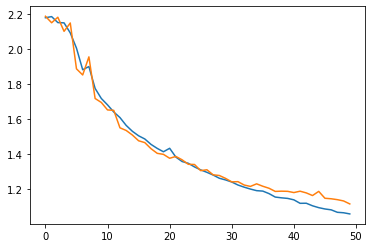

In [39]:
plt.plot(trainer.loss_history[0])
plt.plot(trainer.loss_history[1])

In [36]:
from core.visualization import *
import seaborn as sns

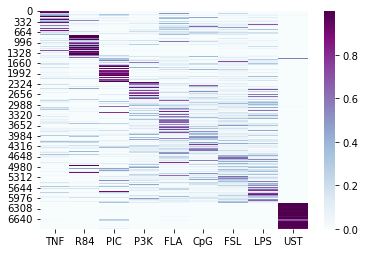

In [37]:
fraction = Fraction(y_true, y_prob)
cf = sns.heatmap(fraction, cmap='BuPu', xticklabels=ligands)

<h3>Plots</h3>

In [35]:
import matplotlib.pyplot as plt

In [36]:
plt.plot(trainer.val_losses)
plt.plot(trainer.train_losses)

AttributeError: 'LSTMTrainer' object has no attribute 'val_losses'

3 LSTM layer seems to have even better accuracy, could continue optimizing parameters further

<h3>Classification Report</h3>

In [37]:
# not a holistic look at the data

In [ ]:
import sklearn.metrics

In [ ]:
report = sklearn.metrics.classification_report(dic["y_true"], dic["y_pred"], target_names=ligands, output_dict=True)
rep = pd.DataFrame(report).transpose()

In [ ]:
rep

In [ ]:
confusion = sklearn.metrics.confusion_matrix(dic["y_true"], dic["y_pred"])
plot = sklearn.metrics.ConfusionMatrixDisplay(confusion)

In [ ]:
plot.plot()